<a href="https://colab.research.google.com/github/anujdutt9/PyTorch-DeepLearning/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Generate a Dataset
num_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X,y = make_blobs(n_samples=num_pts, n_features=2, centers=centers, cluster_std=0.4 ,random_state=101)

In [3]:
X

array([[-0.55393629,  0.65621114],
       [-0.40474922,  1.29866091],
       [-0.02259292, -1.1531696 ],
       [-0.69884161,  0.19837212],
       [-0.08960634,  0.43736084],
       [ 0.9534812 , -0.28872531],
       [-0.43323815,  0.57380074],
       [-0.34558788,  1.33360741],
       [ 0.1781394 , -0.39858078],
       [ 0.48172941, -0.4950316 ],
       [-1.28904204,  0.15324599],
       [ 1.31181767, -0.91854335],
       [ 0.58273994,  0.75125308],
       [ 0.53260934, -0.66607645],
       [-0.87329489,  0.8820226 ],
       [ 0.59479825, -0.41968781],
       [-0.51263166,  0.75993033],
       [-0.13681222,  0.7015303 ],
       [ 0.84566595, -1.12437258],
       [-0.37893382,  1.17748917],
       [-0.17131346, -0.36641076],
       [-0.80213014,  0.3614326 ],
       [ 0.34356441,  0.19739078],
       [ 0.11144297, -1.10893315],
       [ 0.41768308,  0.49759607],
       [-0.95465784,  0.50014659],
       [-0.72743254,  1.0629353 ],
       [-0.17691763,  0.52918387],
       [ 0.6311379 ,

In [4]:
y

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [0]:
# Function to make a Scatter plot of Dataset
def scatter_plot():
  # Plot all values of X where y == 0 in 1st and 2nd Column of X
  plt.scatter(X[y==0, 0], X[y==0, 1])

  # Plot all values of X where y == 1 in 1st and 2nd Column of X
  plt.scatter(X[y==1, 0], X[y==1, 1])

In [0]:
# Convert from Numpy to Torch Tensor
X_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100,1))

In [0]:
class Perceptron(nn.Module):
  
  # Constructor
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)
  
  # Forward Pass
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  
  # Predict Function
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0

In [8]:
torch.manual_seed(2)

In [0]:
# Initialize Model
model = Perceptron(input_size=2, output_size=1)

In [10]:
model

Perceptron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [0]:
# Function to get Model Parameters
def get_params():
  [w, b] = model.parameters()
  w1, w2 = w.view(2)
  b = b[0].item()
  return (w1.item(), w2.item(), b)

In [0]:
# Function to plot Best Fit Line
def plot_fit(title):
  plt.title(title)
  w1, w2, b = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

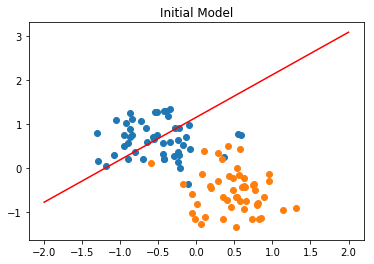

In [14]:
plot_fit(title='Initial Model')

In [0]:
# Loss Criterion
criterion = nn.BCELoss()

In [0]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
# Epochs
epochs = 1000

In [18]:
losses = []

for e in range(epochs):
  y_pred = model.forward(X_data.type(torch.FloatTensor))
  
  loss = criterion(y_pred, y_data.type(torch.FloatTensor))
  
  print('epoch: {}'.format(e),
       'loss: {}'.format(loss))
  
  losses.append(loss)
  
  optimizer.zero_grad()
  
  loss.backward()
  
  optimizer.step()

epoch: 0 loss: 0.6122863292694092
epoch: 1 loss: 0.6110818982124329
epoch: 2 loss: 0.6098825931549072
epoch: 3 loss: 0.6086879968643188
epoch: 4 loss: 0.6074977517127991
epoch: 5 loss: 0.6063125729560852
epoch: 6 loss: 0.6051320433616638
epoch: 7 loss: 0.6039560437202454
epoch: 8 loss: 0.6027848720550537
epoch: 9 loss: 0.6016181707382202
epoch: 10 loss: 0.6004560589790344
epoch: 11 loss: 0.5992987155914307
epoch: 12 loss: 0.5981456637382507
epoch: 13 loss: 0.5969975590705872
epoch: 14 loss: 0.5958536863327026
epoch: 15 loss: 0.5947144627571106
epoch: 16 loss: 0.5935794711112976
epoch: 17 loss: 0.5924491882324219
epoch: 18 loss: 0.5913233757019043
epoch: 19 loss: 0.5902017951011658
epoch: 20 loss: 0.589084804058075
epoch: 21 loss: 0.5879721641540527
epoch: 22 loss: 0.5868639945983887
epoch: 23 loss: 0.5857598781585693
epoch: 24 loss: 0.5846603512763977
epoch: 25 loss: 0.5835650563240051
epoch: 26 loss: 0.5824739933013916
epoch: 27 loss: 0.5813873410224915
epoch: 28 loss: 0.5803046226501

Text(0, 0.5, 'Loss')

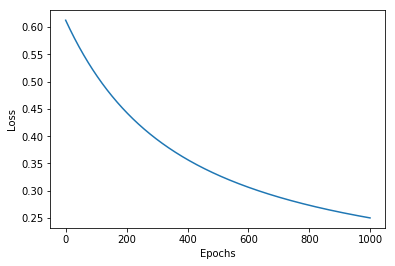

In [19]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

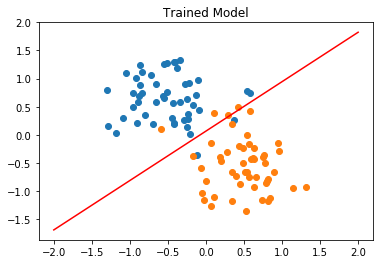

In [20]:
plot_fit(title='Trained Model')

In [21]:
# Model Testing
X_test = torch.tensor([[1.0, -1.0], [-1.0, 1.0]])
X_test

tensor([[ 1., -1.],
        [-1.,  1.]])

In [22]:
X_test[0]

tensor([ 1., -1.])

Red point positive probability: 0.9497867822647095
 Black point positive probability: 0.06094064936041832


Red point in class: 1
 Black point in class: 0


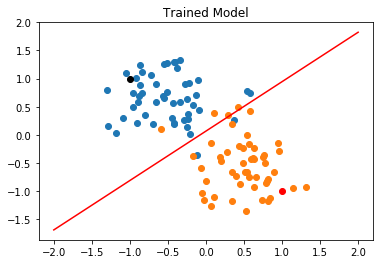

In [23]:
plt.plot(X_test[0].numpy()[0], X_test[0].numpy()[1], 'ro')
plt.plot(X_test[1].numpy()[0], X_test[1].numpy()[1], 'ko')

print('Red point positive probability: {}\n'.format(model.forward(X_test[0]).item()),
     'Black point positive probability: {}'.format(model.forward(X_test[1]).item()))

print('\n')

print('Red point in class: {}\n'.format(model.predict(X_test[0])),
     'Black point in class: {}'.format(model.predict(X_test[1])))

plot_fit(title='Trained Model')